### Activity5 - Question 3 and 5

### Priyanka Gandhi
### Saisree Bhuma
### Suma Mari
### Jainam Shah

In [1]:
#Importing all necessary packages
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
import warnings
warnings.filterwarnings('ignore')

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import PowerTransformer
from sklearn.metrics import accuracy_score

In [3]:
#Loading dataset
df = pd.read_csv('HeartDisease.csv')

In [4]:
df.head()

,names,sbp,tobacco,ldl,adiposity,famhist,typea,obesity,alcohol,age,chd
0,1,160,12.00,5.73,23.11,Present,49,25.30,97.20,52,1
1,2,144,0.01,4.41,28.61,Absent,55,28.87,2.06,63,1
2,3,118,0.08,3.48,32.28,Present,52,29.14,3.81,46,0
3,4,170,7.50,6.41,38.03,Present,51,31.99,24.26,58,1
4,5,134,13.60,3.50,27.78,Present,60,25.99,57.34,49,1


In [5]:
df1=df.drop(['names', 'famhist',], axis=1)

In [6]:
df1.shape

(462, 9)

In [7]:
df1.isnull().sum()

sbp          0
tobacco      0
ldl          0
adiposity    0
typea        0
obesity      0
alcohol      0
age          0
chd          0
dtype: int64

In [8]:
df1.describe()

,sbp,tobacco,ldl,adiposity,typea,obesity,alcohol,age,chd
count,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000
mean,138.326840,3.635649,4.740325,25.406732,53.103896,26.044113,17.044394,42.816017,0.346320
std,20.496317,4.593024,2.070909,7.780699,9.817534,4.213680,24.481059,14.608956,0.476313
min,101.000000,0.000000,0.980000,6.740000,13.000000,14.700000,0.000000,15.000000,0.000000
25%,124.000000,0.052500,3.282500,19.775000,47.000000,22.985000,0.510000,31.000000,0.000000
50%,134.000000,2.000000,4.340000,26.115000,53.000000,25.805000,7.510000,45.000000,0.000000
75%,148.000000,5.500000,5.790000,31.227500,60.000000,28.497500,23.892500,55.000000,1.000000
max,218.000000,31.200000,15.330000,42.490000,78.000000,46.580000,147.190000,64.000000,1.000000


In [9]:
X = df1.drop(columns=['chd'])
y = df1.iloc[:,-1]

## Question-3

Looking at the below distribution it is clear that the distribution is normal/close to normal.There is No Transformation required.

Choosing Yeo-Johnson Power Transformation Technique to work on this activity since Yeo-Johnson is the advanced version of Box-cox transformation which supports both -ve and +ve values. We can acheive this transformation by choosing optimal power lambdas. 

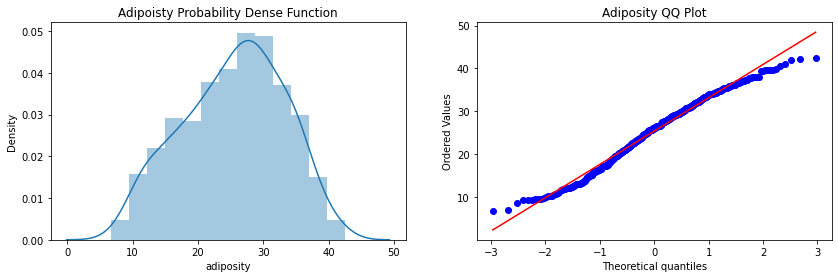

In [10]:
plt.figure(figsize=(14,4))
plt.subplot(121)
sns.distplot(X['adiposity'])
plt.title('Adipoisty Probability Dense Function')

plt.subplot(122)
stats.probplot(X['adiposity'], dist="norm", plot=plt)
plt.title('Adiposity QQ Plot')

plt.show()

In [11]:
d1=df1.skew()

In [12]:
d1

sbp          1.180591
tobacco      2.079210
ldl          1.313104
adiposity   -0.214646
typea       -0.346438
obesity      0.905219
alcohol      2.312699
age         -0.381734
chd          0.648095
dtype: float64

According to Descriptive stats, if the distribution skewness is between -0.5 and 0.5, it can be considered as the symmetric distribution. But, to re-confirm we can evaluate the model as part of question-04 and perform transformation using you-Johnson and compare the results and make decision.

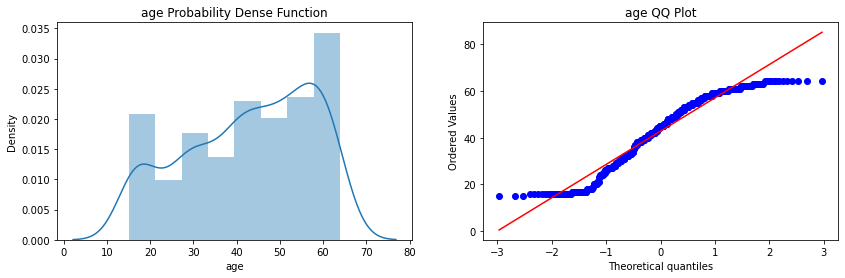

In [13]:
plt.figure(figsize=(14,4))
plt.subplot(121)
sns.distplot(X['age'])
plt.title('age Probability Dense Function')

plt.subplot(122)
stats.probplot(X['age'], dist="norm", plot=plt)
plt.title('age QQ Plot')

plt.show()

## Question-05 was answered using accuracy and c-staistic performance metric to check which metric is outperforming.

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [15]:

# Applying Logistic Regression without any transformation
lr = LogisticRegression()
lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)

accuracy_score(y_test,y_pred)

0.6881720430107527

In [16]:
from sklearn.model_selection import KFold
n_splits=10
random_state=7
scoring='accuracy'

In [17]:
# Cross checking with cross val score
lr2 = LogisticRegression()
kfold_spot=KFold(n_splits=n_splits,random_state=random_state,shuffle=True)
np.mean(cross_val_score(lr2,X,y,cv=kfold_spot,scoring=scoring))


0.7014338575393155

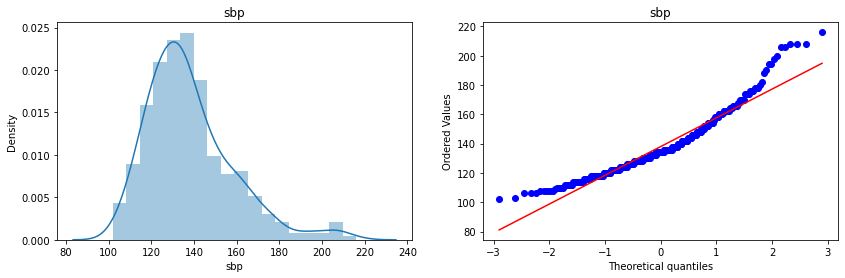

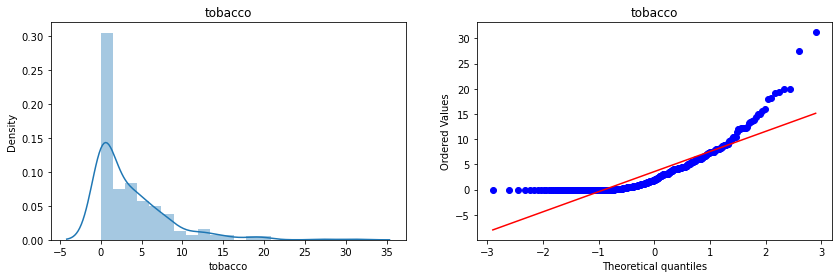

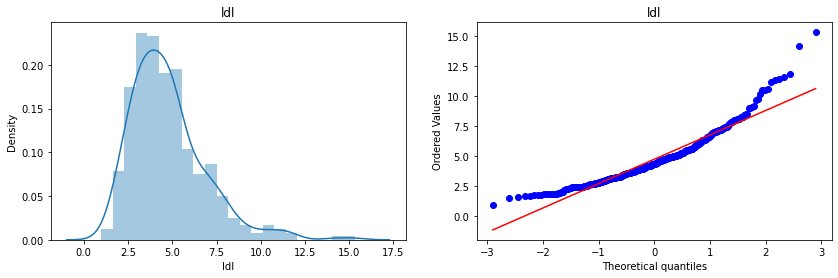

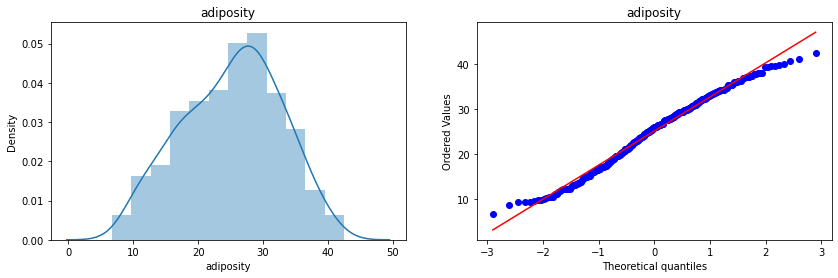

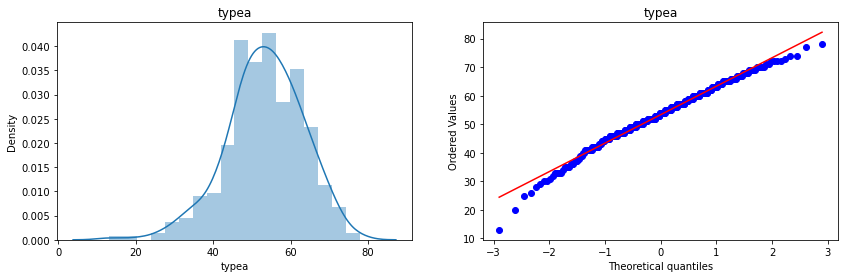

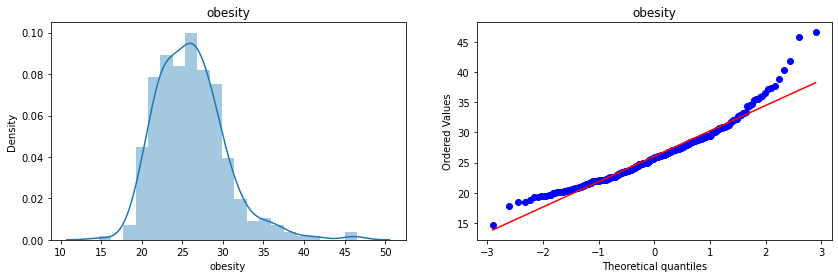

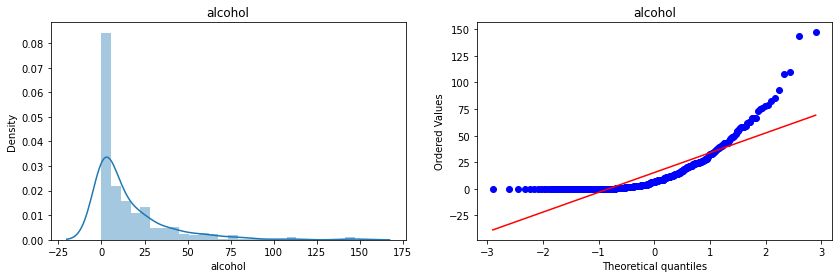

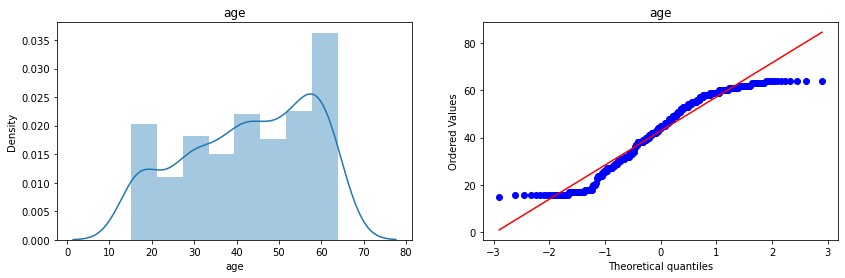

In [18]:
# Plotting the distplots without any transformation

for col in X_train.columns:
    plt.figure(figsize=(14,4))
    plt.subplot(121)
    sns.distplot(X_train[col])
    plt.title(col)

    plt.subplot(122)
    stats.probplot(X_train[col], dist="norm", plot=plt)
    plt.title(col)

    plt.show()


In [19]:
# Apply Yeo-Johnson transform

pt1 = PowerTransformer(method='yeo-johnson')

X_train_transformed2 = pt1.fit_transform(X_train)
X_test_transformed2 = pt1.transform(X_test)

lr3 = LogisticRegression()
lr3.fit(X_train_transformed2,y_train)

y_pred3 = lr3.predict(X_test_transformed2)

print(accuracy_score(y_test,y_pred3))

pd.DataFrame({'Variables':X_train.columns,'Yeo_Johnson_lambdas':pt1.lambdas_})

0.6774193548387096


,Variables,Yeo_Johnson_lambdas
0,sbp,-1.798516
1,tobacco,-0.179018
2,ldl,-0.210922
3,adiposity,1.125681
4,typea,1.653266
5,obesity,-0.689780
6,alcohol,-0.014499
7,age,1.272062


Above Table Displays the Optimal power lamdas!! for all the mentioned columns.

In [20]:
# applying cross val score
#Power Transformer by default will take Yeo_Johnson
pt = PowerTransformer(method='yeo-johnson')
X_transformed2 = pt.fit_transform(X)

lr = LogisticRegression()
kfold_spot=KFold(n_splits=n_splits,random_state=random_state,shuffle=True)
np.mean(cross_val_score(lr,X_transformed2,y,scoring=scoring))

0.7034595605423094

In [21]:
X_train_transformed2 = pd.DataFrame(X_train_transformed2,columns=X_train.columns)

# Before and after Skewness comparision using Yeo-Johnson

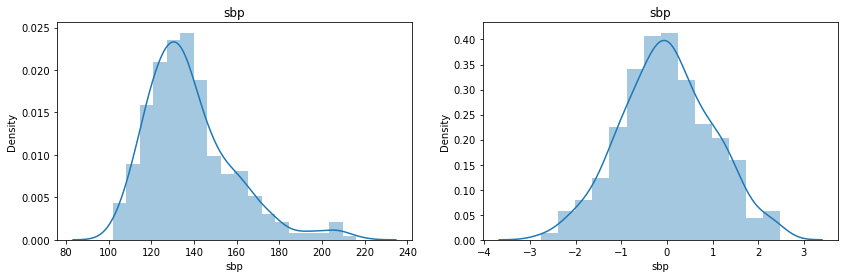

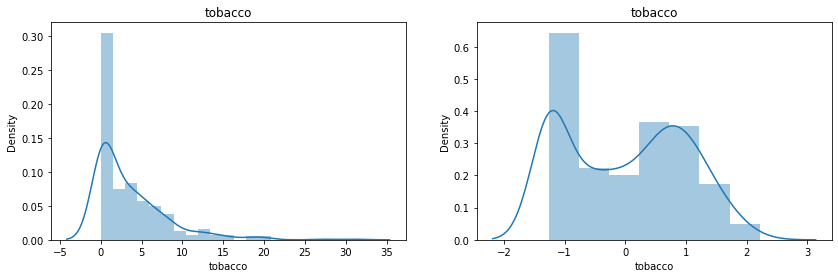

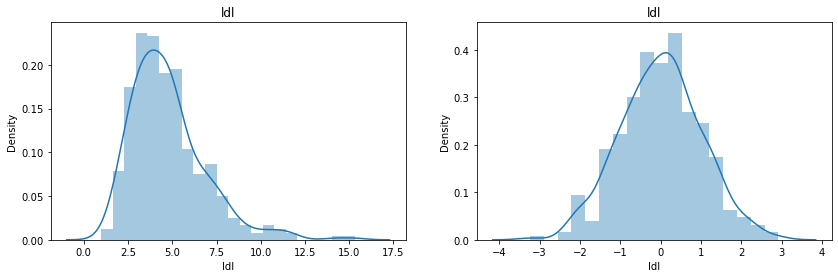

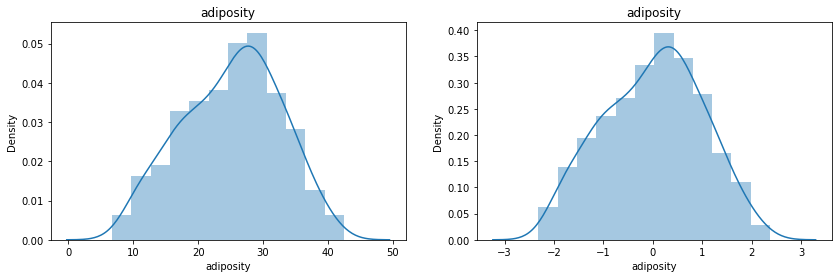

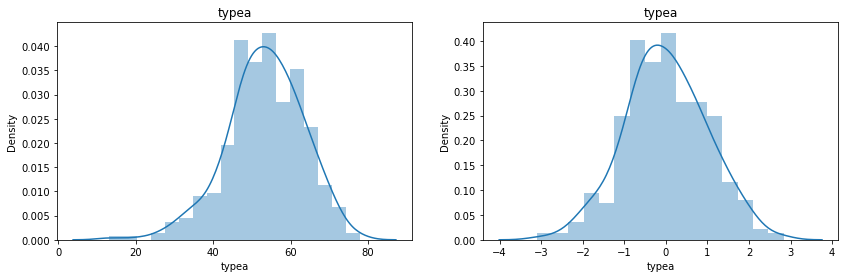

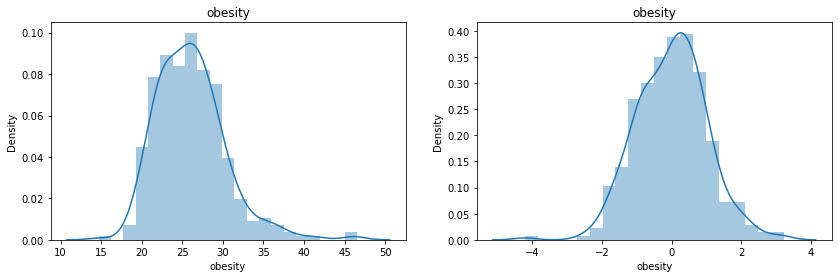

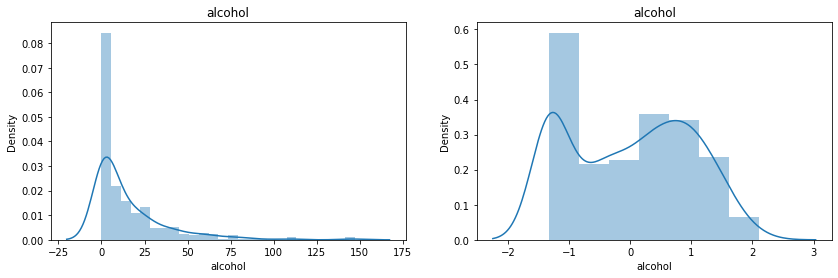

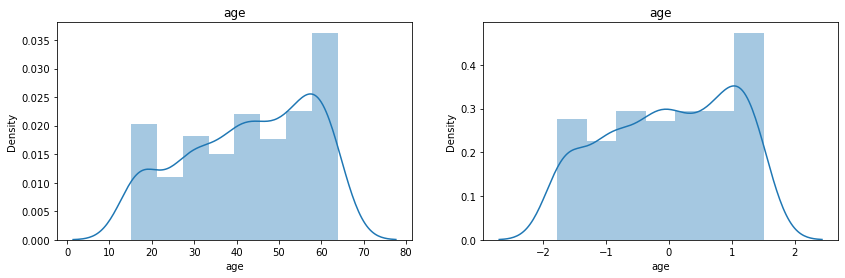

In [22]:
# Before and after comparision for Yeo-Johnson

for col in X_train_transformed2.columns:
    plt.figure(figsize=(14,4))
    plt.subplot(121)
    sns.distplot(X_train[col])
    plt.title(col)

    plt.subplot(122)
    sns.distplot(X_train_transformed2[col])
    plt.title(col)

    plt.show()

## C Statistics performance Metric

In [23]:
#C Stistics is nothing but ROC_AUC 
from sklearn.metrics import roc_auc_score

In [24]:
# Applying Logistic Regression without any transformation
lr = LogisticRegression()
lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)
roc_auc_score(y_test,y_pred)

0.6358424725822532

In [25]:
from sklearn.model_selection import KFold
n_splits=10
random_state=7
scoring="roc_auc"

In [26]:
# Cross checking with cross val score
lr2 = LogisticRegression()
kfold_spot=KFold(n_splits=n_splits,random_state=random_state,shuffle=True)
np.mean(cross_val_score(lr2,X_train,y_train,cv=kfold_spot,scoring=scoring))


0.7377233591690113

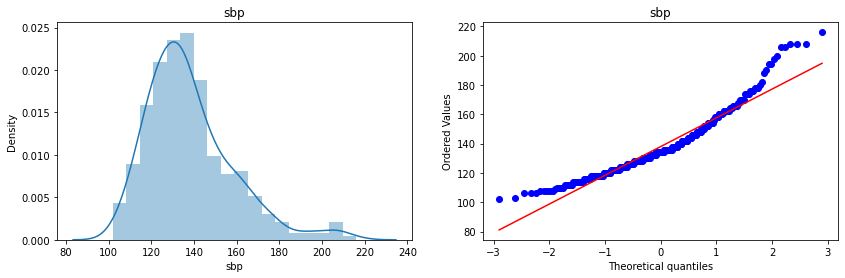

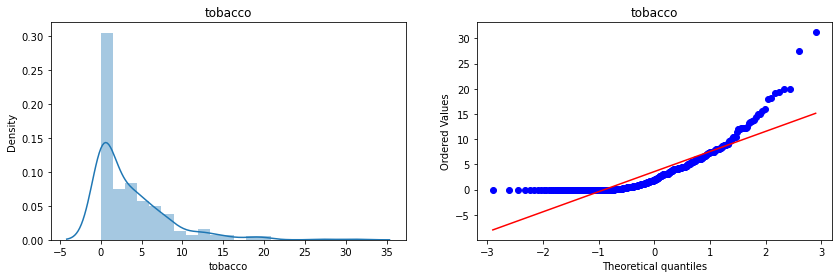

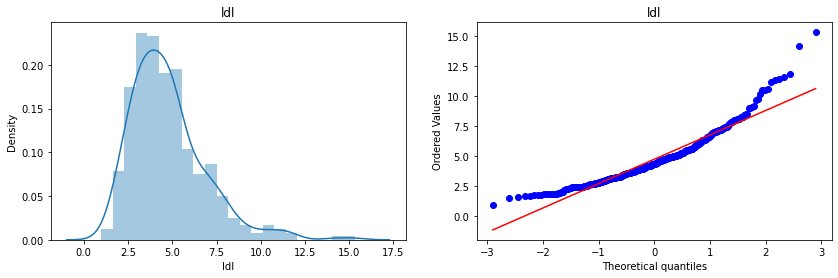

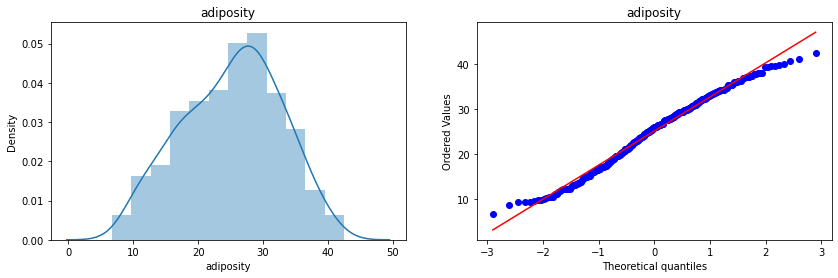

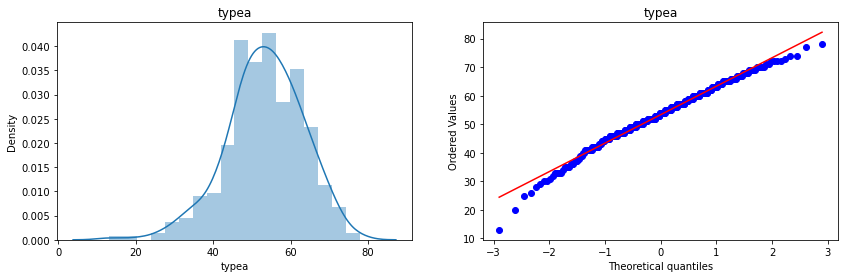

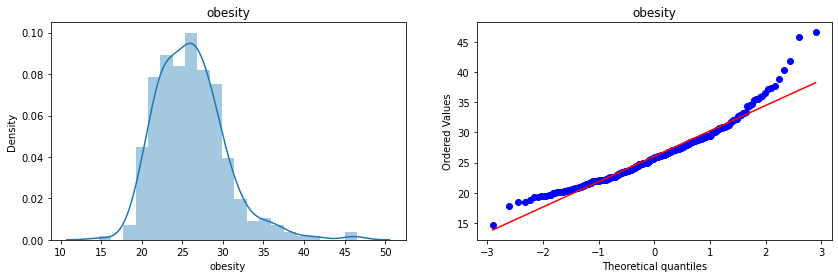

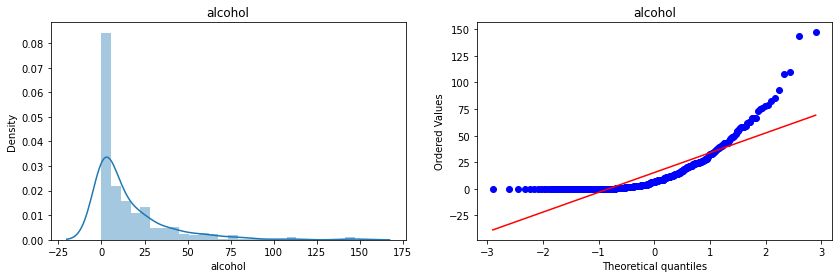

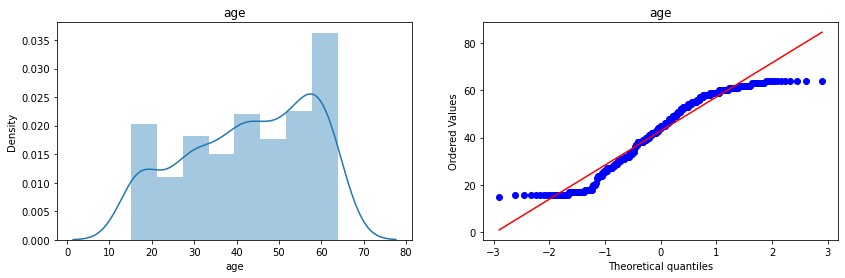

In [27]:
# Plotting the distplots without any transformation

for col in X_train.columns:
    plt.figure(figsize=(14,4))
    plt.subplot(121)
    sns.distplot(X_train[col])
    plt.title(col)

    plt.subplot(122)
    stats.probplot(X_train[col], dist="norm", plot=plt)
    plt.title(col)

    plt.show()


In [28]:
# Apply Yeo-Johnson transform
#By default powerTRANSFORMER CONSIDER You_Johnson according to python sklearn package but for understanding i have mentioned the name
pt1 = PowerTransformer(method='yeo-johnson')

X_train_transformed2 = pt1.fit_transform(X_train)
X_test_transformed2 = pt1.transform(X_test)

lr3 = LogisticRegression()
lr3.fit(X_train_transformed2,y_train)

y_pred3 = lr3.predict(X_test_transformed2)

print(accuracy_score(y_test,y_pred3))

pd.DataFrame({'cols':X_train.columns,'Yeo_Johnson_lambdas':pt1.lambdas_})

0.6774193548387096


,cols,Yeo_Johnson_lambdas
0,sbp,-1.798516
1,tobacco,-0.179018
2,ldl,-0.210922
3,adiposity,1.125681
4,typea,1.653266
5,obesity,-0.689780
6,alcohol,-0.014499
7,age,1.272062


In [29]:
# applying cross val score
#Power Transformer by default will take Yeo_Johnson
pt = PowerTransformer(method='yeo-johnson')
X_transformed2 = pt.fit_transform(X)

lr = LogisticRegression()
kfold_spot=KFold(n_splits=n_splits,random_state=random_state,shuffle=True)
np.mean(cross_val_score(lr,X_transformed2,y,scoring=scoring))

0.7588063524590164

In [30]:
X_train_transformed2 = pd.DataFrame(X_train_transformed2,columns=X_train.columns)

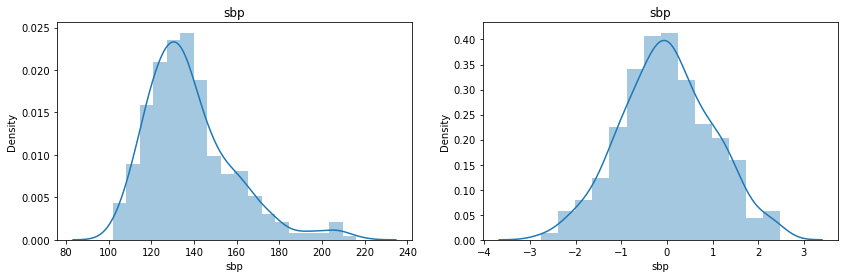

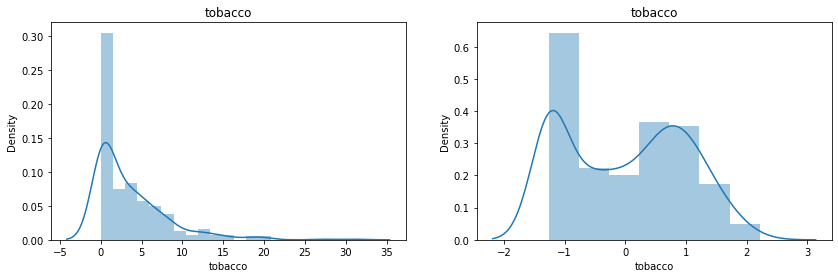

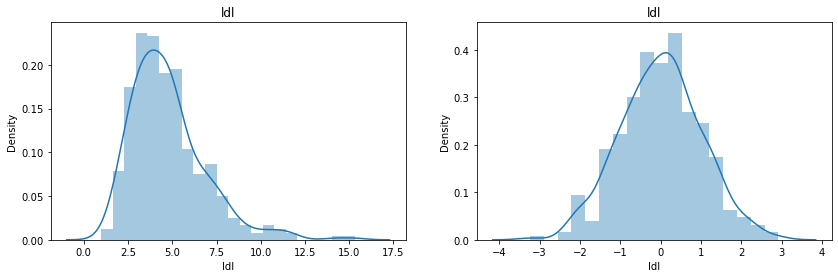

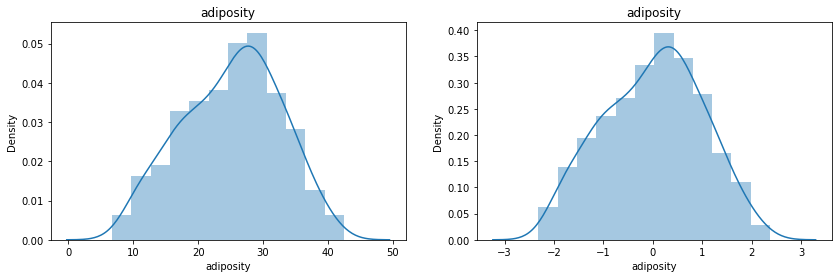

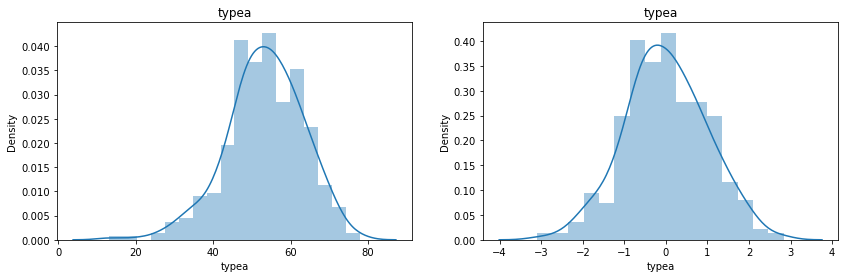

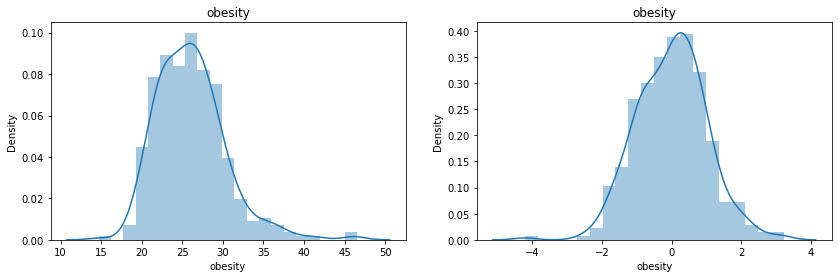

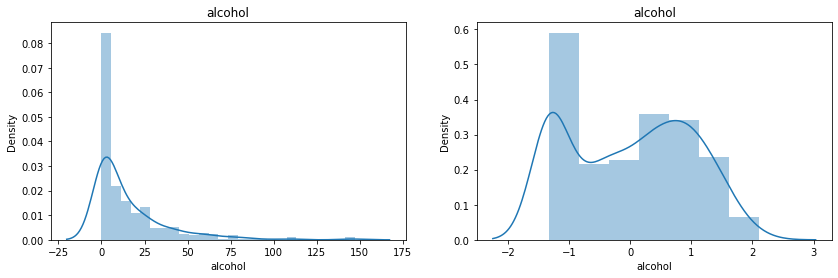

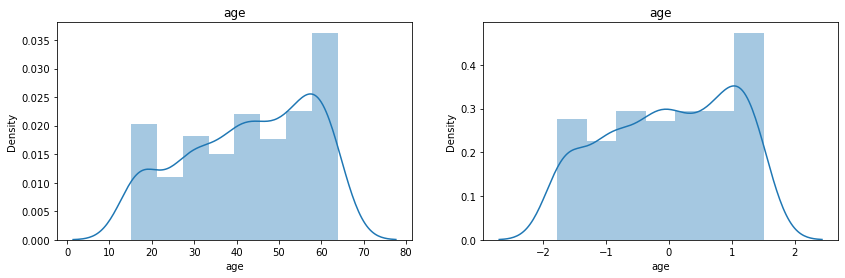

In [31]:
# Before and after comparision for Yeo-Johnson

for col in X_train_transformed2.columns:
    plt.figure(figsize=(14,4))
    plt.subplot(121)
    sns.distplot(X_train[col])
    plt.title(col)

    plt.subplot(122)
    sns.distplot(X_train_transformed2[col])
    plt.title(col)

    plt.show()

As answerd in the third question stating transformation is not required, i.e., seeing the above graphs comparision with before and after skweness, it is giving us clear interpretation that transformation doesnot show any impact on the two variables "age" and "adiposity". As part of question-05, we built model using logistic regression and displayed the skewness comparsion of all the mentioned variables before transformation and after transformation by choosing you-johnson optimal lambds power and choosen performance metrics as C-statistics and accuracy score.

Also, in 2 performance measures, C-Stats is outperforming with yeo-johnson transformation model using Logistic Regression and roc_auc score of 0.7588063524590164

## Results Table

In [40]:
# Define a dictionary containing Performance metric data with values before transformation and after transformation.
data = {'Performance Measure': ['C-Statistics', 'Accuracy score'],
        'Before_Transformation': [0.7377233591690113, 0.6881720430107527],
        'After_Transformation': [0.7588063524590164,0.7034595605423094]}

In [41]:
Results=pd.DataFrame(data)

In [42]:
Results

,Performance Measure,Before_Transformation,After_Transformation
0,C-Statistics,0.737723,0.758806
1,Accuracy score,0.688172,0.703460
